# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ozernovskiy
Processing Record 2 of Set 1 | la ronge
Processing Record 3 of Set 1 | mastic beach
Processing Record 4 of Set 1 | carballo
Processing Record 5 of Set 1 | muroto
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | whittlesea
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | ballina
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | lolua
City not found. Skipping...
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | san quintin
Processing Record 18 of Set 1 | maniitsoq
Processing Record 19 of Set 1 | fort nelson
Processing Record 20 of Set 1 | nadym
Processing Record 21 of Set 1 | vaitupu
City 

Processing Record 36 of Set 4 | avarua
Processing Record 37 of Set 4 | sitka
Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | tahoua
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | plouzane
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | bojkovice
Processing Record 48 of Set 4 | corrente
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | carnarvon
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | yelizovo
Processing Record 3 of Set 5 | bojnurd
Processing Record 4 of Set 5 | morondava
Processing Record 5 of Set 5 | sechura
Processing Record 6 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 7 of Set 5 | sao jose da coroa grande
Processing Record 8 of Set 5 | lircay

Processing Record 27 of Set 8 | sandnessjoen
Processing Record 28 of Set 8 | moose factory
Processing Record 29 of Set 8 | sohag
Processing Record 30 of Set 8 | sur
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | east london
Processing Record 33 of Set 8 | armilla
Processing Record 34 of Set 8 | villa constitucion
Processing Record 35 of Set 8 | san andres
Processing Record 36 of Set 8 | asau
Processing Record 37 of Set 8 | shambu
Processing Record 38 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 39 of Set 8 | tuni
Processing Record 40 of Set 8 | havre-saint-pierre
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | san pedro del parana
Processing Record 44 of Set 8 | molochnoye
Processing Record 45 of Set 8 | adrar
Processing Record 46 of Set 8 | banyo
Processing Record 47 of Set 8 | kaeo
Processing Record 48 of Set 8 | yarada
Processing Record 49 of Set 8 | saleaula
City no

Processing Record 13 of Set 12 | sapulpa
Processing Record 14 of Set 12 | smithers
Processing Record 15 of Set 12 | balkhash
Processing Record 16 of Set 12 | iqaluit
Processing Record 17 of Set 12 | nagato
Processing Record 18 of Set 12 | paita
Processing Record 19 of Set 12 | banjar
Processing Record 20 of Set 12 | ganganagar
Processing Record 21 of Set 12 | little current
Processing Record 22 of Set 12 | laguna
Processing Record 23 of Set 12 | nouakchott
Processing Record 24 of Set 12 | lakes entrance
Processing Record 25 of Set 12 | groa
Processing Record 26 of Set 12 | oksovskiy
Processing Record 27 of Set 12 | sile
Processing Record 28 of Set 12 | tacuarembo
Processing Record 29 of Set 12 | port augusta
Processing Record 30 of Set 12 | te anau
Processing Record 31 of Set 12 | kouroussa
Processing Record 32 of Set 12 | sao joao da barra
Processing Record 33 of Set 12 | tanabe
Processing Record 34 of Set 12 | los chiles
Processing Record 35 of Set 12 | tete
Processing Record 36 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ozernovskiy,51.5000,156.5167,1.42,99,95,4.89,RU,1681432334
1,la ronge,55.1001,-105.2842,10.12,27,40,2.06,CA,1681432335
2,mastic beach,40.7668,-72.8521,25.43,62,0,3.60,US,1681432335
3,carballo,43.2130,-8.6910,11.67,91,100,5.05,ES,1681432335
4,muroto,33.2833,134.1500,16.75,69,100,2.54,JP,1681432335


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ozernovskiy,51.5000,156.5167,1.42,99,95,4.89,RU,1681432334
1,la ronge,55.1001,-105.2842,10.12,27,40,2.06,CA,1681432335
2,mastic beach,40.7668,-72.8521,25.43,62,0,3.60,US,1681432335
3,carballo,43.2130,-8.6910,11.67,91,100,5.05,ES,1681432335
4,muroto,33.2833,134.1500,16.75,69,100,2.54,JP,1681432335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

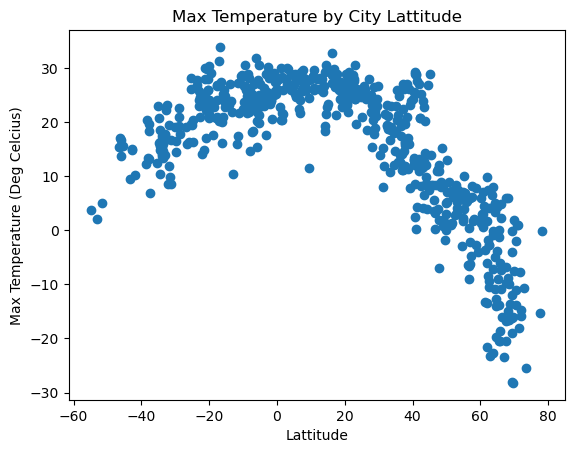

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Max Temperature (Deg Celcius)')
plt.title("Max Temperature by City Lattitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

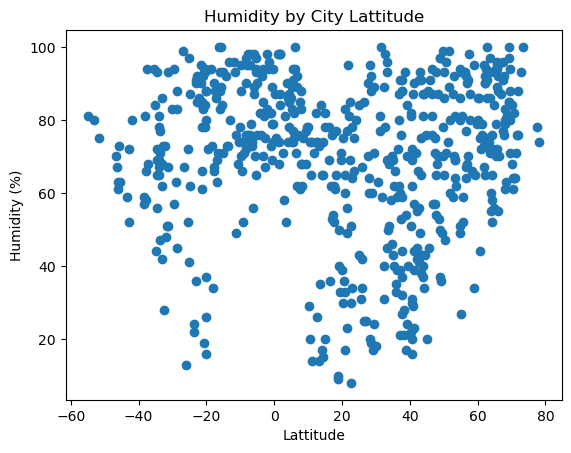

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

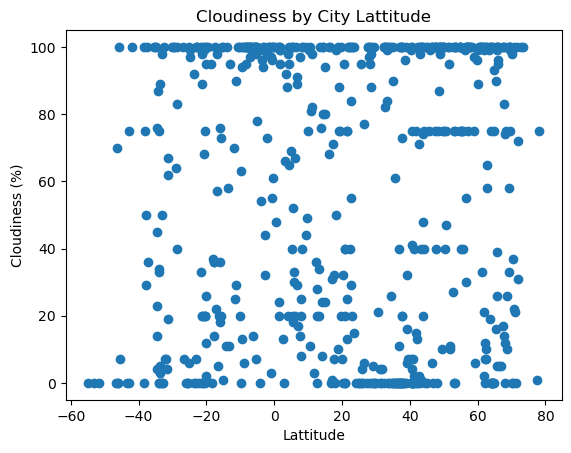

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

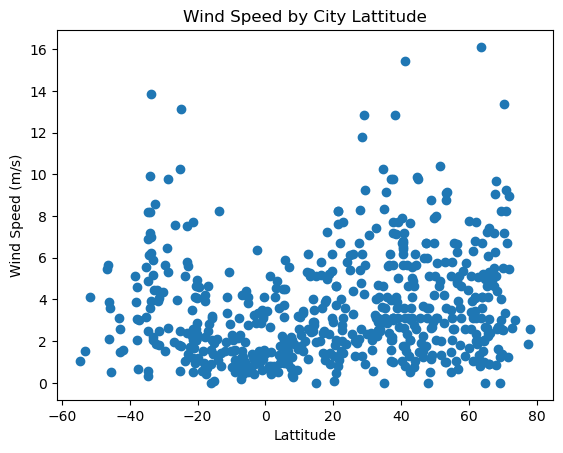

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("Wind Speed by City Lattitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linreg(x,y,a,b):
    slope, intercept, r, p, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"red")
    plt.annotate(line_eq, xy=(a, b), xycoords='axes fraction',fontsize=15,color="red")
    print(f"The r is: {r}")
    print(f"The r-squared is: {r**2}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat'] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ozernovskiy,51.5000,156.5167,1.42,99,95,4.89,RU,1681432334
1,la ronge,55.1001,-105.2842,10.12,27,40,2.06,CA,1681432335
2,mastic beach,40.7668,-72.8521,25.43,62,0,3.60,US,1681432335
3,carballo,43.2130,-8.6910,11.67,91,100,5.05,ES,1681432335
4,muroto,33.2833,134.1500,16.75,69,100,2.54,JP,1681432335


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat'] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port lincoln,-34.7333,135.8667,20.88,44,100,8.18,AU,1681432335
6,whittlesea,-32.1759,26.8244,8.54,73,7,1.89,ZA,1681432336
7,ushuaia,-54.8000,-68.3000,3.81,81,0,1.03,AR,1681432106
9,ballina,-28.8667,153.5667,22.66,63,64,6.46,AU,1681432132
10,port alfred,-33.5906,26.8910,16.05,77,3,7.00,ZA,1681432336


###  Temperature vs. Latitude Linear Regression Plot

The r is: -0.8659905560564201
The r-squared is: 0.7499396431789076


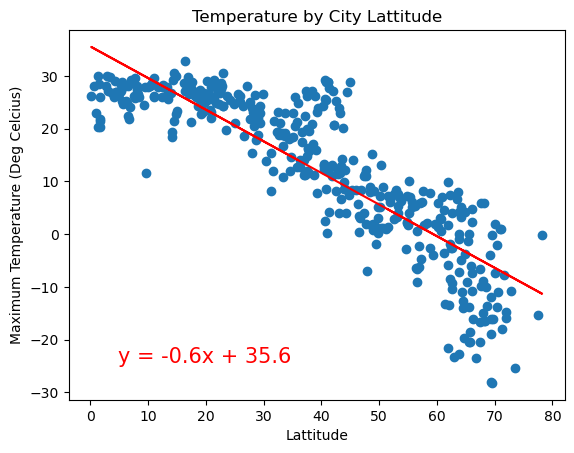

In [17]:
# Linear regression on Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Maximum Temperature (Deg Celcius)')
plt.title("Temperature by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],.1,.1)

The r is: 0.6828470783705224
The r-squared is: 0.46628013243915833


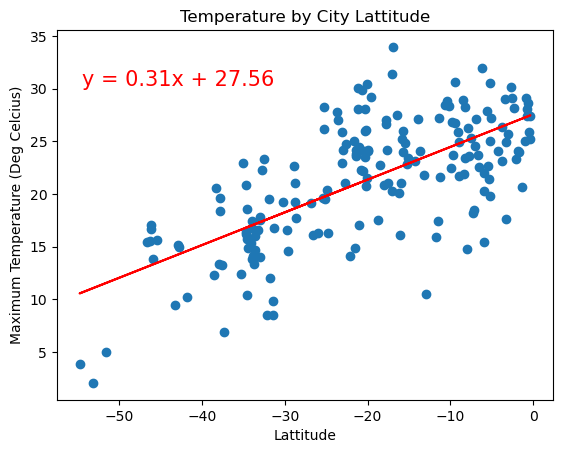

In [18]:
# Linear regression on Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Maximum Temperature (Deg Celcius)')
plt.title("Temperature by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],.05,.85)

**Discussion about the linear relationship:** According to the regression lines, there is significant correlation between the temperature and the latitude in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r is: 0.18283733463824145
The r-squared is: 0.03342949093761629


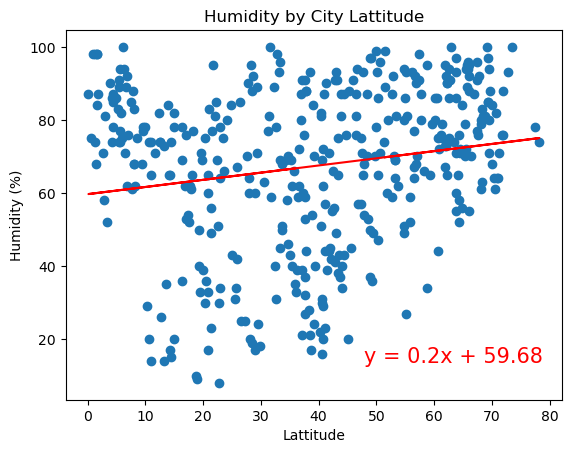

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],.6,.1)

The r is: 0.29384557148022106
The r-squared is: 0.0863452198785377


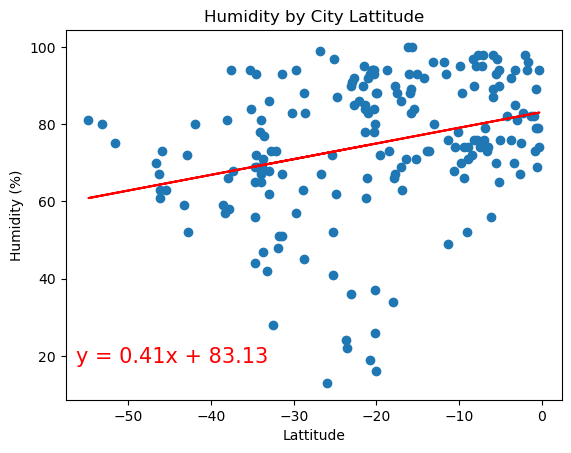

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],.02,.1)

**Discussion about the linear relationship:** According to the regression lines, there is little correlation between the humidity and the latitude in the nothern hemisphere, but there is positive correlation in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r is: 0.0664759343128436
The r-squared is: 0.004419049842765497


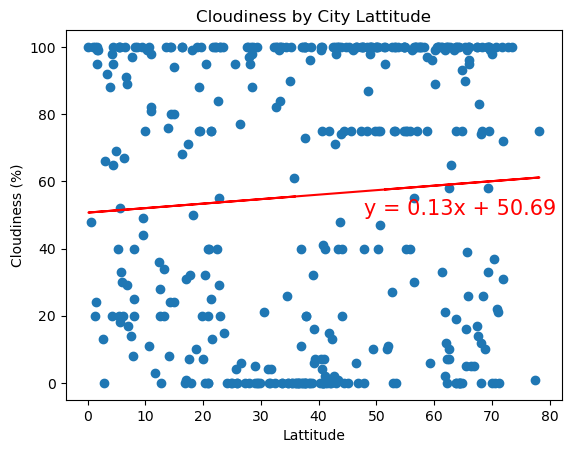

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],.6,.5)

The r is: 0.3577306344182207
The r-squared is: 0.1279712068012627


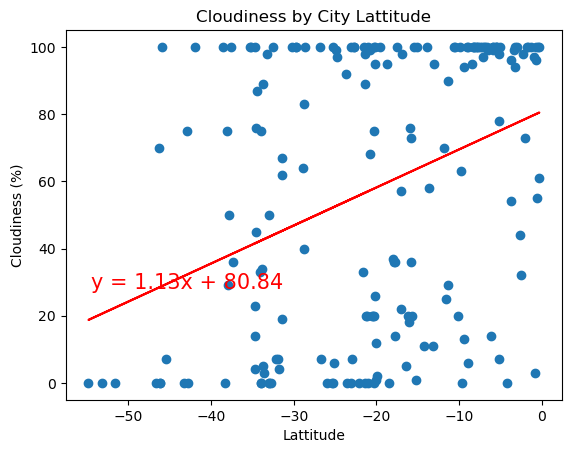

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],.05,.3)

**Discussion about the linear relationship:** While there is no correlation between the cloudiness and latitude in the nothern hemisphere, there is significant positive correlation in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r is: 0.1990140747753513
The r-squared is: 0.03960660195868912


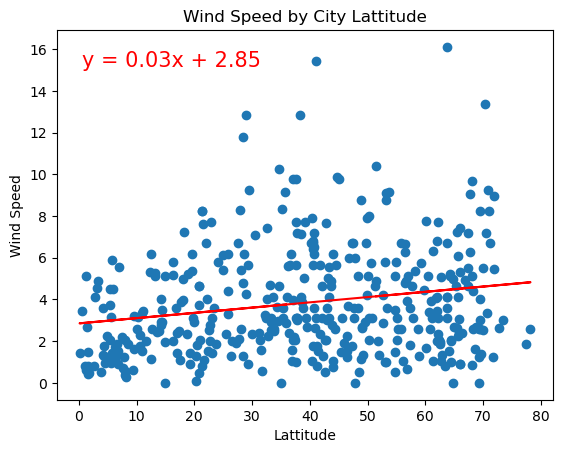

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed')
plt.title("Wind Speed by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],.05,.9)

The r is: -0.3355567901731574
The r-squared is: 0.1125983594313124


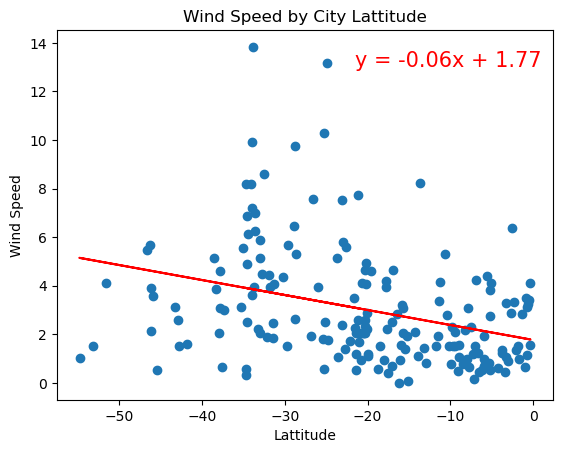

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed')
plt.title("Wind Speed by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],.6,.9)

**Discussion about the linear relationship:** While there is little correlation between the wind speed and the latitude in the nothern hemisphere, there is again, a significant correlation in the southern hemisphere.